In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
pd.set_option("display.max_columns", None)

In [18]:
# Data between 1987-2017, daily
df = pd.read_csv('https://raw.githubusercontent.com/badranyoussef/bi-exam-project-stock/refs/heads/main/notebooks/data%20between%201987%20and%202017.csv')

In [19]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Close SP500         7500 non-null   float64       
 1   Open SP500          7500 non-null   float64       
 2   High SP500          7500 non-null   float64       
 3   Low SP500           7500 non-null   float64       
 4   Volume SP500        7500 non-null   float64       
 5   Interest Rate       7500 non-null   float64       
 6   Unemployment Rate   7500 non-null   float64       
 7   Inflation Rate      7500 non-null   float64       
 8   CPIAUCSL            7500 non-null   float64       
 9   Open RUSSELL2000    7500 non-null   float64       
 10  High RUSSELL2000    7500 non-null   float64       
 11  Low RUSSELL2000     7500 non-null   float64       
 12  Close RUSSELL2000   7500 non-null   float64       
 13  Volume RUSSELL2000  7500 non-null   float64     

In [20]:
# Calculate the difference between the Open and Close value on the same day
df['OPEN_CLOSE_CHANGE_%_SP500'] = (df['Close SP500'] - df['Open SP500']) / df['Open SP500']
df['OPEN_CLOSE_CHANGE_%_RUSSELL2000'] = (df['Close RUSSELL2000'] - df['Open RUSSELL2000']) / df['Open RUSSELL2000']
df['OPEN_CLOSE_CHANGE_%_Gold'] = (df['Close Gold'] - df['Open Gold']) / df['Open Gold']

# Calculate other changes PERCENT
df['Interest_Rate_Change'] = df['Interest Rate'].diff()
df['Inflation_Rate_Change'] = df['Inflation Rate'].diff()
df['Unemployment_Rate_Change'] = df['Unemployment Rate'].diff()
df['CPI_Change'] = df['CPIAUCSL'].diff()

In [6]:
df.columns

Index(['Close SP500', 'Open SP500', 'High SP500', 'Low SP500', 'Volume SP500',
       'Interest Rate', 'Unemployment Rate', 'Inflation Rate', 'CPIAUCSL',
       'Open RUSSELL2000', 'High RUSSELL2000', 'Low RUSSELL2000',
       'Close RUSSELL2000', 'Volume RUSSELL2000', 'Close Oil', 'Close Gold',
       'Open Gold', 'High Gold', 'Low Gold', 'Change % Gold', 'Date',
       'OPEN_CLOSE_CHANGE_%_SP500', 'OPEN_CLOSE_CHANGE_%_RUSSELL2000',
       'OPEN_CLOSE_CHANGE_%_Gold', 'Interest_Rate_Change',
       'Inflation_Rate_Change', 'Unemployment_Rate_Change', 'CPI_Change'],
      dtype='object')

In [21]:
# Sæt 'Date' som index, da det er nødvendigt for resampling
df.set_index('Date', inplace=True)

# Skab et dataset baseret på uge data
df_weekly = df.resample('W').agg({
    'Open SP500': 'first',        # Åbningskurs for S&P 500 i starten af ugen
    'High SP500': 'max',          # Højeste kurs for S&P 500 i ugen
    'Low SP500': 'min',           # Laveste kurs for S&P 500 i ugen
    'Close SP500': 'last',        # Lukkekurs for S&P 500 i slutningen af ugen
    'Volume SP500': 'sum',        # Samlet volumen for S&P 500 i ugen
    'Interest Rate': 'last',      # Sidste renteværdi i ugen
    'Unemployment Rate': 'last',  # Sidste arbejdsløshedsværdi i ugen
    'Inflation Rate': 'last',     # Sidste inflationsværdi i ugen
    'CPIAUCSL': 'last',           # Sidste CPI værdi i ugen
    'Open RUSSELL2000': 'first',  # Åbningskurs for Russell 2000 i starten af ugen
    'High RUSSELL2000': 'max',    # Højeste kurs for Russell 2000 i ugen
    'Low RUSSELL2000': 'min',     # Laveste kurs for Russell 2000 i ugen
    'Close RUSSELL2000': 'last',  # Lukkekurs for Russell 2000 i slutningen af ugen
    'Volume RUSSELL2000': 'sum',  # Samlet volumen for Russell 2000 i ugen
    'Close Oil': 'last',          # Lukkekurs for olie i slutningen af ugen
    'Close Gold': 'last',         # Lukkekurs for guld i slutningen af ugen
    'OPEN_CLOSE_CHANGE_%_SP500': 'sum',  # Gennemsnitlig ændring fra åbning til lukning i procent for S&P 500
    'OPEN_CLOSE_CHANGE_%_RUSSELL2000': 'sum',  # Gennemsnitlig ændring fra åbning til lukning i procent for Russell 2000
    'OPEN_CLOSE_CHANGE_%_Gold': 'sum',  # Gennemsnitlig ændring fra åbning til lukning i procent for guld
    'Interest_Rate_Change': 'last',  # Sidste ændring i rente i ugen
    'Inflation_Rate_Change': 'last', # Sidste ændring i inflation i ugen
    'Unemployment_Rate_Change': 'last',  # Sidste ændring i arbejdsløshed i ugen
    'CPI_Change': 'last'            # Sidste CPI ændring i ugen
})

In [22]:
df_weekly = df_weekly.reset_index()

In [23]:
df_weekly

,Date,Open SP500,High SP500,Low SP500,Close SP500,Volume SP500,Interest Rate,Unemployment Rate,Inflation Rate,CPIAUCSL,Open RUSSELL2000,High RUSSELL2000,Low RUSSELL2000,Close RUSSELL2000,Volume RUSSELL2000,Close Oil,Close Gold,OPEN_CLOSE_CHANGE_%_SP500,OPEN_CLOSE_CHANGE_%_RUSSELL2000,OPEN_CLOSE_CHANGE_%_Gold,Interest_Rate_Change,Inflation_Rate_Change,Unemployment_Rate_Change,CPI_Change
0,1987-10-04,8.054483,9.257685,8.954092,9.175296,7.768236e+06,7.29,6.0,4.3,115.000,170.820007,172.089996,170.250000,172.080002,3.823000e+08,18.65,454.87,0.258136,0.007363,-0.006058,0.0,0.0,0.0,0.0
1,1987-10-11,8.191843,9.256174,8.759207,8.807021,2.005927e+07,7.29,6.0,4.3,115.000,172.089996,172.619995,166.009995,166.119995,8.786000e+08,18.60,461.37,0.563284,-0.035164,-0.012029,0.0,0.0,0.0,0.0
2,1987-10-18,7.828462,8.946082,8.040240,8.141451,2.527455e+07,7.29,6.0,4.3,115.000,166.110001,166.110001,152.610001,152.740005,1.123900e+09,19.00,467.20,0.542738,-0.082782,-0.021070,0.0,0.0,0.0,0.0
3,1987-10-25,6.764206,7.913957,6.158590,7.056312,4.500350e+07,7.29,6.0,4.3,115.000,152.740005,152.740005,120.209999,121.589996,2.299800e+09,18.98,473.15,0.528340,-0.210957,-0.070327,0.0,0.0,0.0,0.0
4,1987-11-01,6.030389,7.252987,6.340609,7.088962,4.015610e+07,6.69,5.8,4.4,115.400,121.580002,121.580002,105.459999,118.260002,1.713300e+09,18.80,468.67,0.733979,0.076384,-0.031019,-0.6,0.1,-0.2,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,2016-12-04,82.843713,83.598955,81.061983,81.863390,3.398484e+07,0.54,4.7,2.2,242.637,1346.880005,1346.880005,1308.849976,1314.250000,2.158943e+10,52.35,1176.92,-0.015374,-0.025773,-0.005131,0.0,0.0,0.0,0.0
1523,2016-12-11,82.245443,85.027028,81.599321,84.340678,3.252160e+07,0.54,4.7,2.2,242.637,1314.979980,1392.709961,1314.979980,1388.069946,2.033743e+10,52.19,1157.87,0.021442,0.054548,-0.020665,0.0,0.0,0.0,0.0
1524,2016-12-18,84.306176,85.317837,83.015543,83.784324,3.828856e+07,0.54,4.7,2.2,242.637,1387.780029,1388.530029,1354.069946,1364.189941,2.238761e+10,54.15,1134.09,-0.011261,-0.016770,-0.021412,0.0,0.0,0.0,0.0
1525,2016-12-25,83.847430,84.825433,83.162482,83.971982,2.574295e+07,0.54,4.7,2.2,242.637,1364.780029,1385.060059,1360.250000,1371.510010,1.429625e+10,53.93,1133.49,0.000058,0.005200,-0.001097,0.0,0.0,0.0,0.0


In [24]:
# Skab et dataset baseret på uge data
df_monthly = df.resample('M').agg({
    'Open SP500': 'first',        # Åbningskurs for S&P 500 i starten af ugen
    'High SP500': 'max',          # Højeste kurs for S&P 500 i ugen
    'Low SP500': 'min',           # Laveste kurs for S&P 500 i ugen
    'Close SP500': 'last',        # Lukkekurs for S&P 500 i slutningen af ugen
    'Volume SP500': 'sum',        # Samlet volumen for S&P 500 i ugen
    'Interest Rate': 'last',      # Sidste renteværdi i ugen
    'Unemployment Rate': 'last',  # Sidste arbejdsløshedsværdi i ugen
    'Inflation Rate': 'last',     # Sidste inflationsværdi i ugen
    'CPIAUCSL': 'last',           # Sidste CPI værdi i ugen
    'Open RUSSELL2000': 'first',  # Åbningskurs for Russell 2000 i starten af ugen
    'High RUSSELL2000': 'max',    # Højeste kurs for Russell 2000 i ugen
    'Low RUSSELL2000': 'min',     # Laveste kurs for Russell 2000 i ugen
    'Close RUSSELL2000': 'last',  # Lukkekurs for Russell 2000 i slutningen af ugen
    'Volume RUSSELL2000': 'sum',  # Samlet volumen for Russell 2000 i ugen
    'Close Oil': 'last',          # Lukkekurs for olie i slutningen af ugen
    'Close Gold': 'last',         # Lukkekurs for guld i slutningen af ugen
    'OPEN_CLOSE_CHANGE_%_SP500': 'sum',  # Gennemsnitlig ændring fra åbning til lukning i procent for S&P 500
    'OPEN_CLOSE_CHANGE_%_RUSSELL2000': 'sum',  # Gennemsnitlig ændring fra åbning til lukning i procent for Russell 2000
    'OPEN_CLOSE_CHANGE_%_Gold': 'sum',  # Gennemsnitlig ændring fra åbning til lukning i procent for guld
    'Interest_Rate_Change': 'last',  # Sidste ændring i rente i ugen
    'Inflation_Rate_Change': 'last', # Sidste ændring i inflation i ugen
    'Unemployment_Rate_Change': 'last',  # Sidste ændring i arbejdsløshed i ugen
    'CPI_Change': 'last'            # Sidste CPI ændring i ugen
})

In [26]:
df_monthly = df_monthly.reset_index()

In [27]:
change_columns = [
    'Interest_Rate_Change', 'Inflation_Rate_Change', 'Unemployment_Rate_Change', 
    'CPI_Change', 'OPEN_CLOSE_CHANGE_%_SP500', 'OPEN_CLOSE_CHANGE_%_RUSSELL2000', 'OPEN_CLOSE_CHANGE_%_Gold'
]

# For ugentlige data
for col in change_columns:
    df_weekly[f'{col}_Flagged'] = (df_weekly[col] > 0).astype(int)

# For månedlige data
for col in change_columns:
    df_monthly[f'{col}_Flagged'] = (df_monthly[col] > 0).astype(int)

In [28]:
df_monthly

,Date,Open SP500,High SP500,Low SP500,Close SP500,Volume SP500,Interest Rate,Unemployment Rate,Inflation Rate,CPIAUCSL,Open RUSSELL2000,High RUSSELL2000,Low RUSSELL2000,Close RUSSELL2000,Volume RUSSELL2000,Close Oil,Close Gold,OPEN_CLOSE_CHANGE_%_SP500,OPEN_CLOSE_CHANGE_%_RUSSELL2000,OPEN_CLOSE_CHANGE_%_Gold,Interest_Rate_Change,Inflation_Rate_Change,Unemployment_Rate_Change,CPI_Change,Interest_Rate_Change_Flagged,Inflation_Rate_Change_Flagged,Unemployment_Rate_Change_Flagged,CPI_Change_Flagged,OPEN_CLOSE_CHANGE_%_SP500_Flagged,OPEN_CLOSE_CHANGE_%_RUSSELL2000_Flagged,OPEN_CLOSE_CHANGE_%_Gold_Flagged
0,1987-10-31,8.054483,9.257685,6.158590,7.088962,1.314834e+08,7.29,6.0,4.3,115.000,170.820007,172.619995,105.459999,118.260002,6.094500e+09,18.80,468.67,2.502811,-0.312582,-0.139586,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0
1,1987-11-30,6.308780,7.252987,6.390063,6.562143,7.877067e+07,6.69,5.8,4.4,115.400,110.790001,122.050003,107.900002,111.699997,3.892920e+09,17.70,490.46,2.285427,0.012328,-0.109561,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0
2,1987-12-31,5.966937,7.125270,6.242663,6.903975,7.832054e+07,6.77,5.7,4.2,115.600,111.690002,121.589996,106.160004,120.419998,3.926750e+09,17.60,485.85,2.405842,0.077472,-0.143570,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0
3,1988-01-31,6.282613,7.349375,6.715912,7.262558,8.398902e+07,6.83,5.7,4.3,116.000,119.500000,128.190002,118.610001,125.239998,3.664840e+09,16.28,454.01,1.642874,0.048788,-0.150805,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0
4,1988-02-29,6.786893,7.539957,7.035612,7.494760,6.277612e+07,6.58,5.7,4.3,116.200,125.239998,137.690002,124.940002,136.100006,3.693240e+09,14.73,430.23,1.501010,0.083310,-0.157410,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,2016-08-31,82.210412,83.342747,80.943192,81.887120,1.148668e+08,0.40,4.9,2.3,240.545,1220.300049,1251.329956,1198.729980,1239.910034,7.561031e+10,47.94,1308.95,-0.002812,0.015066,-0.031039,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0
347,2016-09-30,81.978999,83.015212,79.445760,81.817914,1.253810e+08,0.40,4.9,2.2,241.176,1240.069946,1263.459961,1206.069946,1251.650024,7.727024e+10,48.24,1315.96,0.005790,0.007499,0.007689,0.0,0.0,0.0,0.0,0,0,0,0,1,1,1
348,2016-10-31,81.578648,82.419012,78.303508,79.321107,1.230605e+08,0.40,4.8,2.1,241.741,1239.930054,1255.709961,1185.170044,1191.390015,7.736997e+10,46.20,1277.38,-0.035196,-0.040479,-0.039491,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
349,2016-11-30,79.320710,83.598955,77.106245,82.300365,1.490539e+08,0.41,4.6,2.1,242.026,1191.770020,1347.199951,1156.079956,1322.339966,8.829976e+10,47.95,1173.11,0.027326,0.098549,-0.072156,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0


In [52]:
df_weekly['Next_Week_SP500'] = df_weekly['OPEN_CLOSE_CHANGE_%_SP500_Flagged'].shift(-1)
df_weekly

,Date,Open SP500,High SP500,Low SP500,Close SP500,Volume SP500,Interest Rate,Unemployment Rate,Inflation Rate,CPIAUCSL,Open RUSSELL2000,High RUSSELL2000,Low RUSSELL2000,Close RUSSELL2000,Volume RUSSELL2000,Close Oil,Close Gold,OPEN_CLOSE_CHANGE_%_SP500,OPEN_CLOSE_CHANGE_%_RUSSELL2000,OPEN_CLOSE_CHANGE_%_Gold,Interest_Rate_Change,Inflation_Rate_Change,Unemployment_Rate_Change,CPI_Change,Interest_Rate_Change_Flagged,Inflation_Rate_Change_Flagged,Unemployment_Rate_Change_Flagged,CPI_Change_Flagged,OPEN_CLOSE_CHANGE_%_SP500_Flagged,OPEN_CLOSE_CHANGE_%_RUSSELL2000_Flagged,OPEN_CLOSE_CHANGE_%_Gold_Flagged,Next_Week_SP500
0,1987-10-04,8.054483,9.257685,8.954092,9.175296,7.768236e+06,7.29,6.0,4.3,115.000,170.820007,172.089996,170.250000,172.080002,3.823000e+08,18.65,454.87,0.258136,0.007363,-0.006058,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,1.0
1,1987-10-11,8.191843,9.256174,8.759207,8.807021,2.005927e+07,7.29,6.0,4.3,115.000,172.089996,172.619995,166.009995,166.119995,8.786000e+08,18.60,461.37,0.563284,-0.035164,-0.012029,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,1.0
2,1987-10-18,7.828462,8.946082,8.040240,8.141451,2.527455e+07,7.29,6.0,4.3,115.000,166.110001,166.110001,152.610001,152.740005,1.123900e+09,19.00,467.20,0.542738,-0.082782,-0.021070,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,1.0
3,1987-10-25,6.764206,7.913957,6.158590,7.056312,4.500350e+07,7.29,6.0,4.3,115.000,152.740005,152.740005,120.209999,121.589996,2.299800e+09,18.98,473.15,0.528340,-0.210957,-0.070327,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,1.0
4,1987-11-01,6.030389,7.252987,6.340609,7.088962,4.015610e+07,6.69,5.8,4.4,115.400,121.580002,121.580002,105.459999,118.260002,1.713300e+09,18.80,468.67,0.733979,0.076384,-0.031019,-0.6,0.1,-0.2,0.4,0,1,0,1,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,2016-12-04,82.843713,83.598955,81.061983,81.863390,3.398484e+07,0.54,4.7,2.2,242.637,1346.880005,1346.880005,1308.849976,1314.250000,2.158943e+10,52.35,1176.92,-0.015374,-0.025773,-0.005131,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0
1523,2016-12-11,82.245443,85.027028,81.599321,84.340678,3.252160e+07,0.54,4.7,2.2,242.637,1314.979980,1392.709961,1314.979980,1388.069946,2.033743e+10,52.19,1157.87,0.021442,0.054548,-0.020665,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0.0
1524,2016-12-18,84.306176,85.317837,83.015543,83.784324,3.828856e+07,0.54,4.7,2.2,242.637,1387.780029,1388.530029,1354.069946,1364.189941,2.238761e+10,54.15,1134.09,-0.011261,-0.016770,-0.021412,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0
1525,2016-12-25,83.847430,84.825433,83.162482,83.971982,2.574295e+07,0.54,4.7,2.2,242.637,1364.780029,1385.060059,1360.250000,1371.510010,1.429625e+10,53.93,1133.49,0.000058,0.005200,-0.001097,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0.0


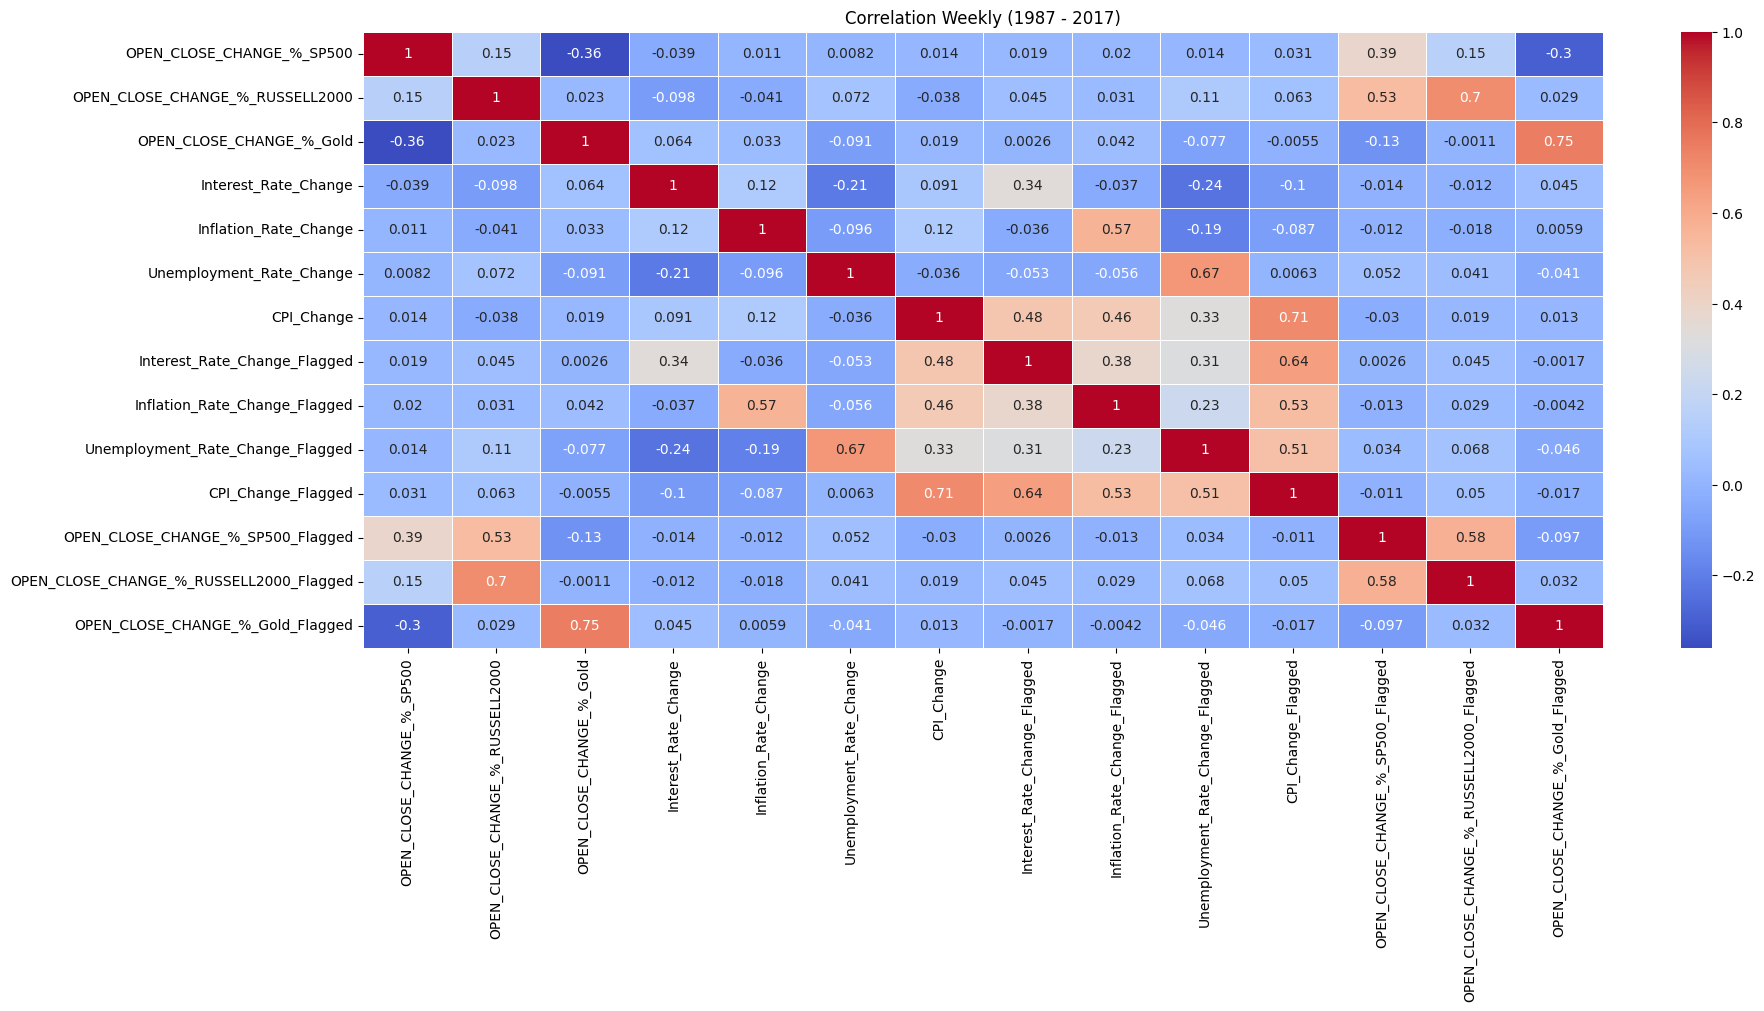

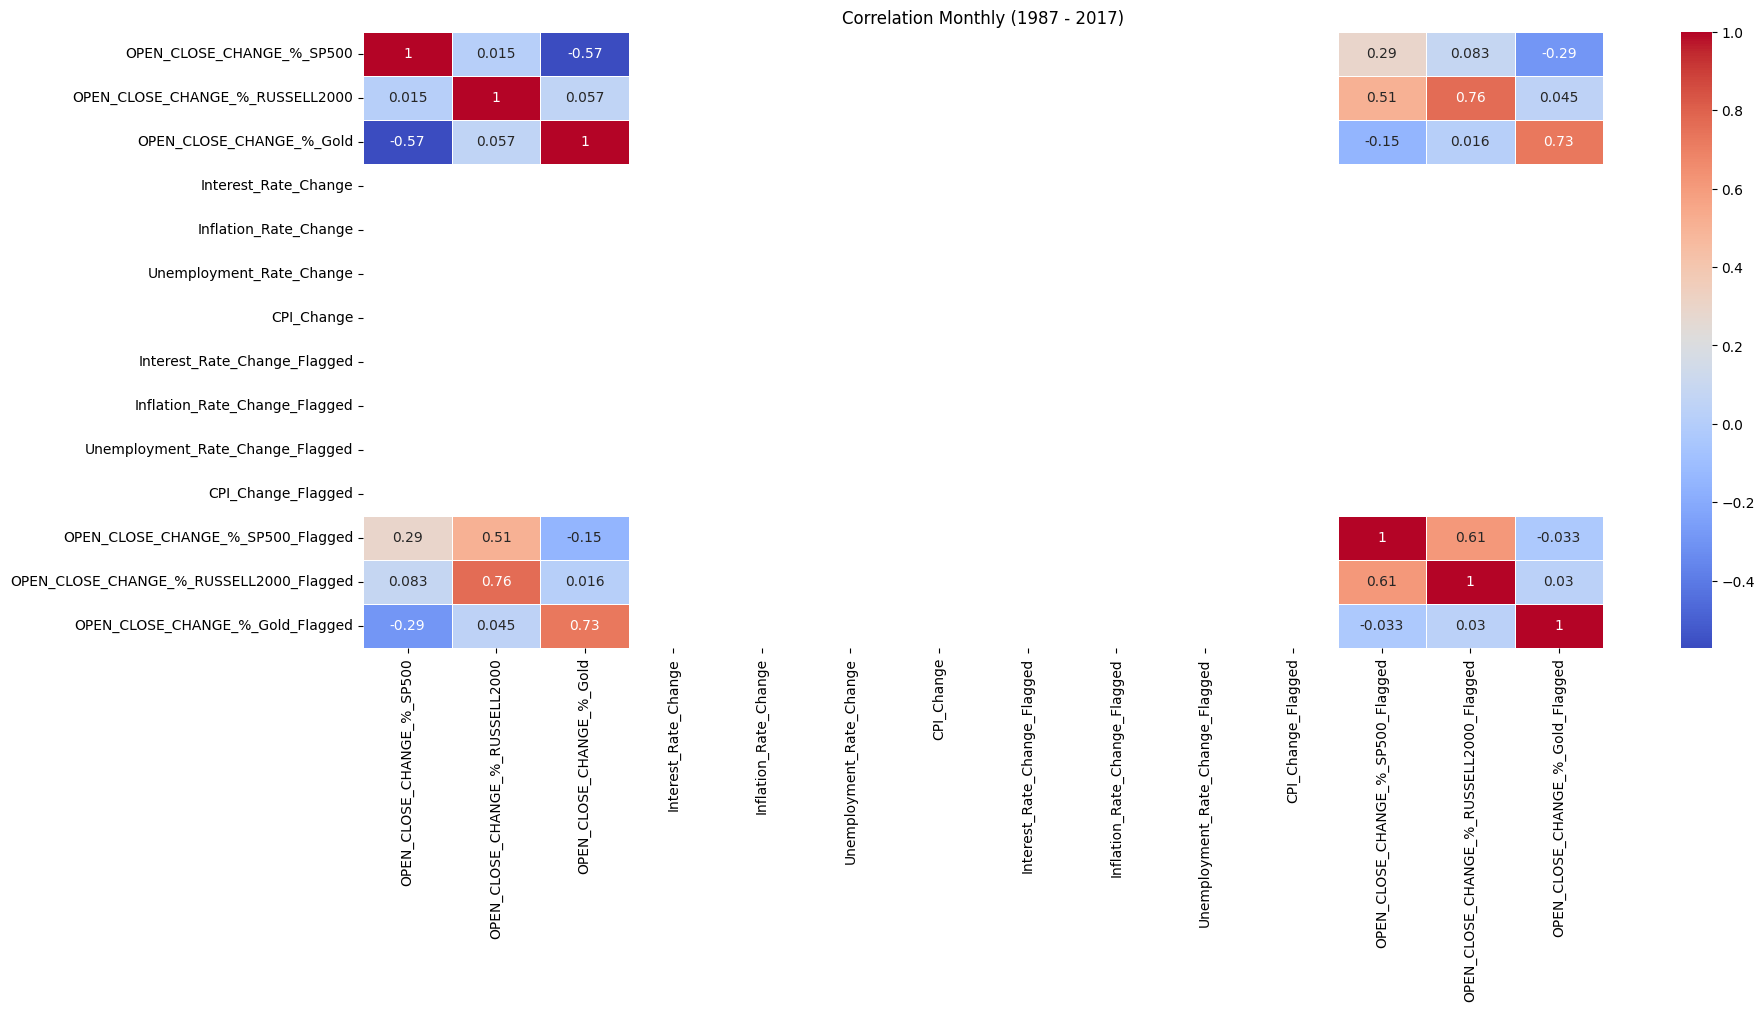

In [40]:
columns_to_drop = ['Date', 'Close SP500', 'Open SP500', 'High SP500', 'Low SP500', 'Volume SP500',
       'Interest Rate', 'Unemployment Rate', 'Inflation Rate', 'CPIAUCSL',
       'Open RUSSELL2000', 'High RUSSELL2000', 'Low RUSSELL2000',
       'Close RUSSELL2000', 'Volume RUSSELL2000', 'Close Oil', 'Close Gold']

plt.figure(figsize=(20, 8))
corrmatt_weekly = df_weekly.drop(columns=columns_to_drop, axis=1).corr()
sns.heatmap(corrmatt_weekly, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Weekly (1987 - 2017)')
plt.show()

plt.figure(figsize=(20, 8))
corrmatt_monthly = df_monthly.drop(columns=columns_to_drop, axis=1).corr()
sns.heatmap(corrmatt_monthly, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Monthly (1987 - 2017)')
plt.show()

## RandomForrestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)
# Because it is time series, i split the last hundred row for test, so i don't mix dates
train = df_weekly.iloc[:-100]
test = df_weekly.iloc[-100:]

train = df_monthly.iloc[:-100]
test = df_monthly.iloc[-100:]

train = df_yearly.iloc[:-100]
test = df_yearly.iloc[-100:]

## Naive Bayes

In [41]:
# Drop Date column as it is not suitable for this
df_movement = df_weekly.drop(columns='Date')
# Split data into features (X) and what we want to predict (y)
X = df_movement.drop(columns=['OPEN_CLOSE_CHANGE_%_SP500_Flagged'])
y = df_movement['OPEN_CLOSE_CHANGE_%_SP500_Flagged']

In [44]:
# Split the data into traning and test and train out chosen model (GaussianNB)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB()

In [45]:
# Test the model score
print(model.score(X_test, Y_test))
print(model.score(X_train, Y_train))

0.5947712418300654
0.6076986076986077


In [47]:
prediction = model.predict(X_test)
prediction

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [49]:
cmat = confusion_matrix(Y_test, prediction)
print(cmat)
print(classification_report(Y_test, prediction))

[[ 31  95]
 [ 29 151]]
              precision    recall  f1-score   support

           0       0.52      0.25      0.33       126
           1       0.61      0.84      0.71       180

    accuracy                           0.59       306
   macro avg       0.57      0.54      0.52       306
weighted avg       0.57      0.59      0.55       306

